<a href="https://colab.research.google.com/github/itzsurya18/AI/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


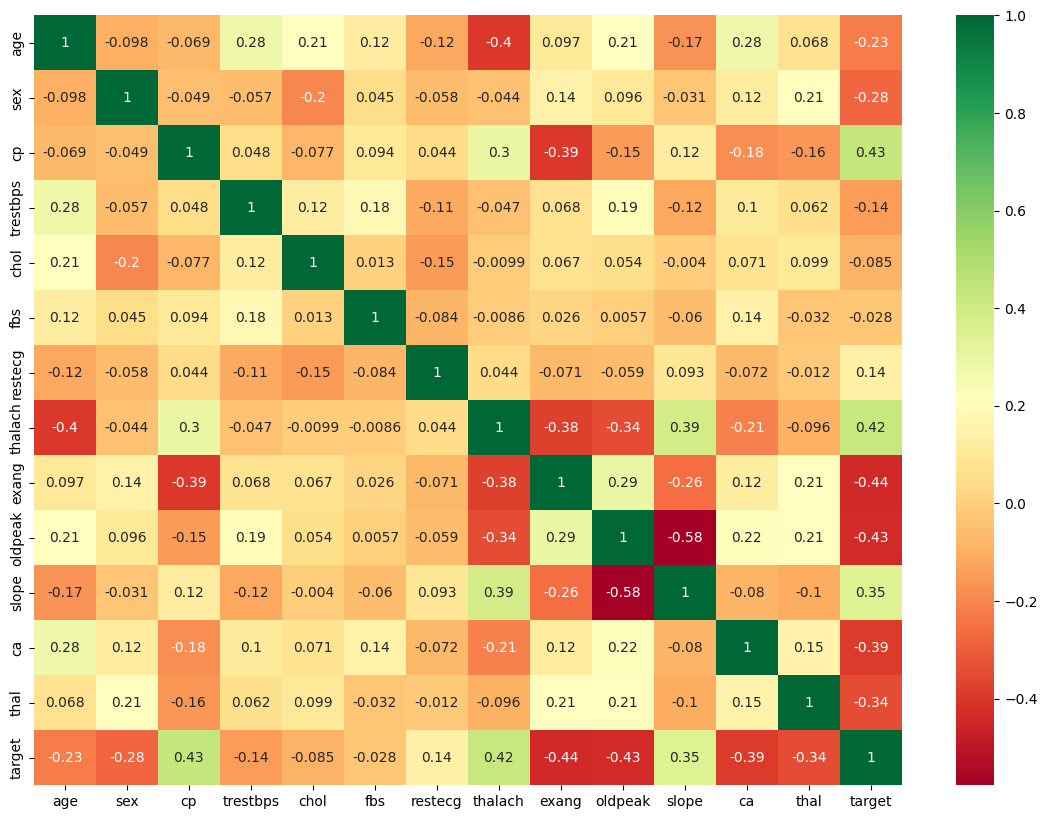

In [5]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

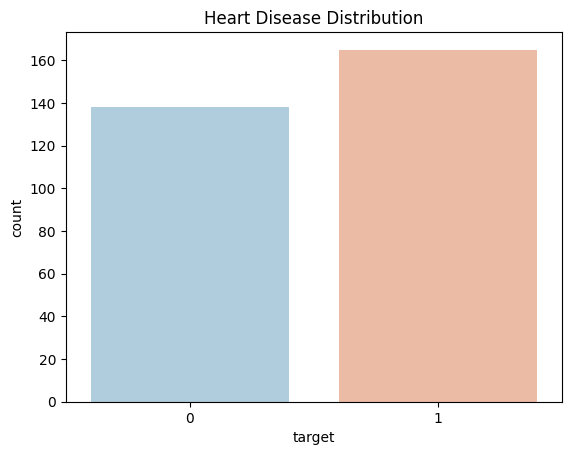

In [6]:
sns.countplot(x='target', data=df, palette='RdBu_r')
plt.title("Heart Disease Distribution")
plt.show()

In [7]:
dataset = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])
scaler = StandardScaler()
columns_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])
X = dataset.drop('target', axis=1)
y = dataset['target']

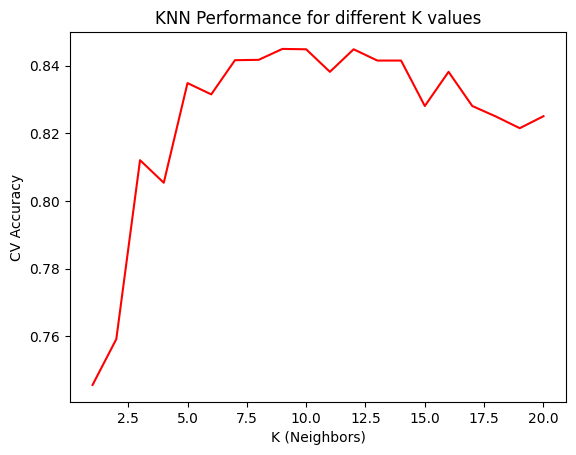

Best K: 9 with Accuracy: 0.8449462365591398


In [8]:
knn_scores = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)
    knn_scores.append(scores.mean())

plt.plot(range(1,21), knn_scores, color='red')
plt.xlabel("K (Neighbors)")
plt.ylabel("CV Accuracy")
plt.title("KNN Performance for different K values")
plt.show()

best_k = np.argmax(knn_scores) + 1
print("Best K:", best_k, "with Accuracy:", knn_scores[best_k-1])

In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_score = cross_val_score(rf, X, y, cv=10).mean()
print("Random Forest Accuracy:", rf_score)

Random Forest Accuracy: 0.8313978494623656


In [10]:
logr = LogisticRegression(max_iter=1000)
logr_score = cross_val_score(logr, X, y, cv=10).mean()
print("Logistic Regression Accuracy:", logr_score)

Logistic Regression Accuracy: 0.854516129032258


In [11]:
svm = SVC(kernel='linear')
svm_score = cross_val_score(svm, X, y, cv=10).mean()
print("SVM Accuracy:", svm_score)

SVM Accuracy: 0.8313978494623656


In [12]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_score = cross_val_score(xgb, X, y, cv=10).mean()
print("XGBoost Accuracy:", xgb_score)

XGBoost Accuracy: 0.7946236559139785
